In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
prefix = '/Users/melawai.it/'

# Preparing The Data

In [12]:
path_can = prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 7/Canada.xlsx'

In [13]:
df_can = pd.read_excel(path_can, 
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20), 
                       skipfooter=2)

In [14]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [15]:
# Dropping Unnecessary Columns
col_drop = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']
df_can.drop(col_drop, axis=1, inplace=True)

# Renaming Columns
newName = {
    'OdName' : 'Country',
    'AreaName' : 'Continent',
    'RegName' : 'Region'
}
df_can.rename(columns=newName, inplace=True)

# For Consistency sake
df_can.columns = list(map(str, df_can.columns))

# Making Country Column become Index
df_can.set_index('Country', inplace=True)
df_can.index.name = None

# Adding new column called 'Total'
df_can['Total'] = df_can[years].sum(axis=1)

# preparing a variable that will make us easy to slicing df
years = list(map(str, range(1980, 2014)))

print('Data Dimension : ',df_can.shape)

Data Dimension :  (195, 38)


/var/folders/pw/z_nfq_0j4g3ckjz532ktnkjm0000gn/T/ipykernel_2920/4052582386.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


# Visualization

## Word Cloud

In [ ]:
!pip install wordcloud

In [20]:
from wordcloud import WordCloud, STOPWORDS

In [21]:
path_alice = prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 8/alice_novel.txt'

In [22]:
alice_novel = open(path_alice, 'r').read()

In [25]:
stopwords = set(STOPWORDS)

In [33]:
alice_wc = WordCloud(
                background_color='white',
                max_words=2000,
                stopwords=stopwords,
                width = 1350,
                height = 1050
)

In [34]:
alice_wc.generate(alice_novel)

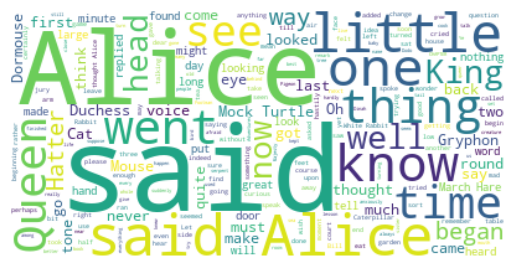

In [29]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

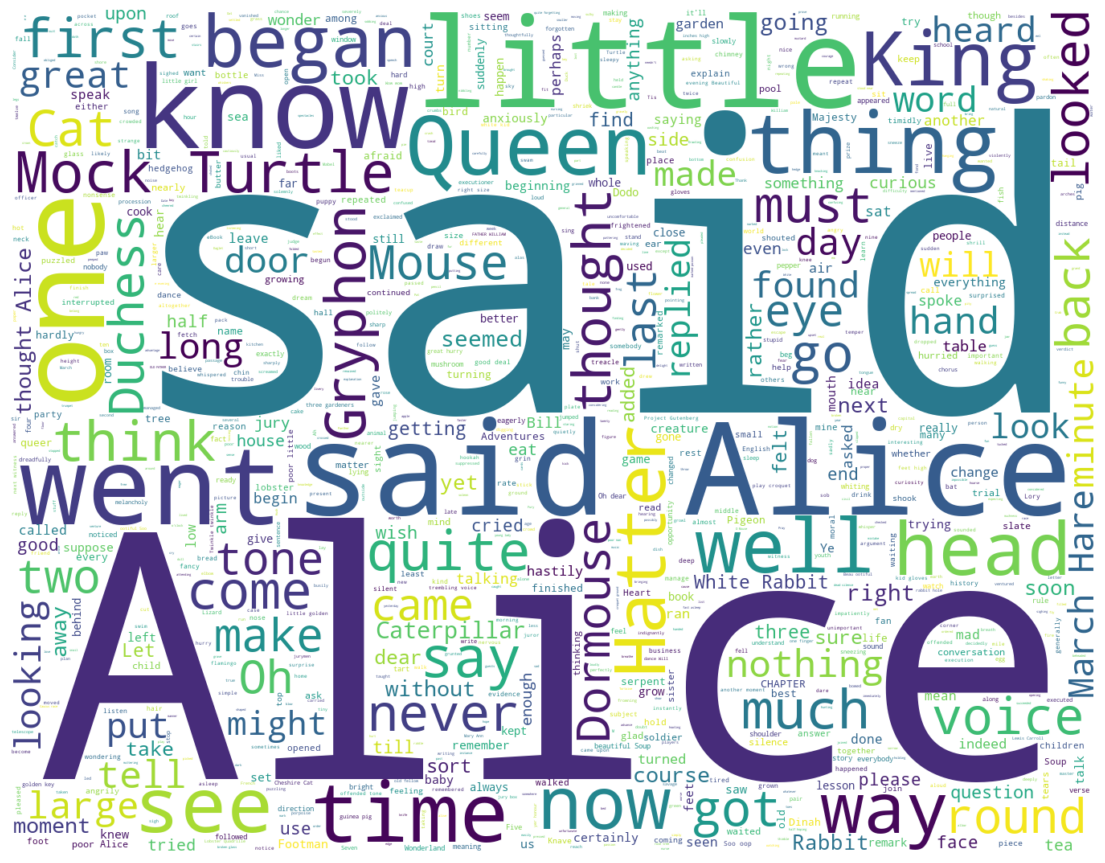

In [35]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
stopwords.add('said')

In [37]:
alice_wc.generate(alice_novel)

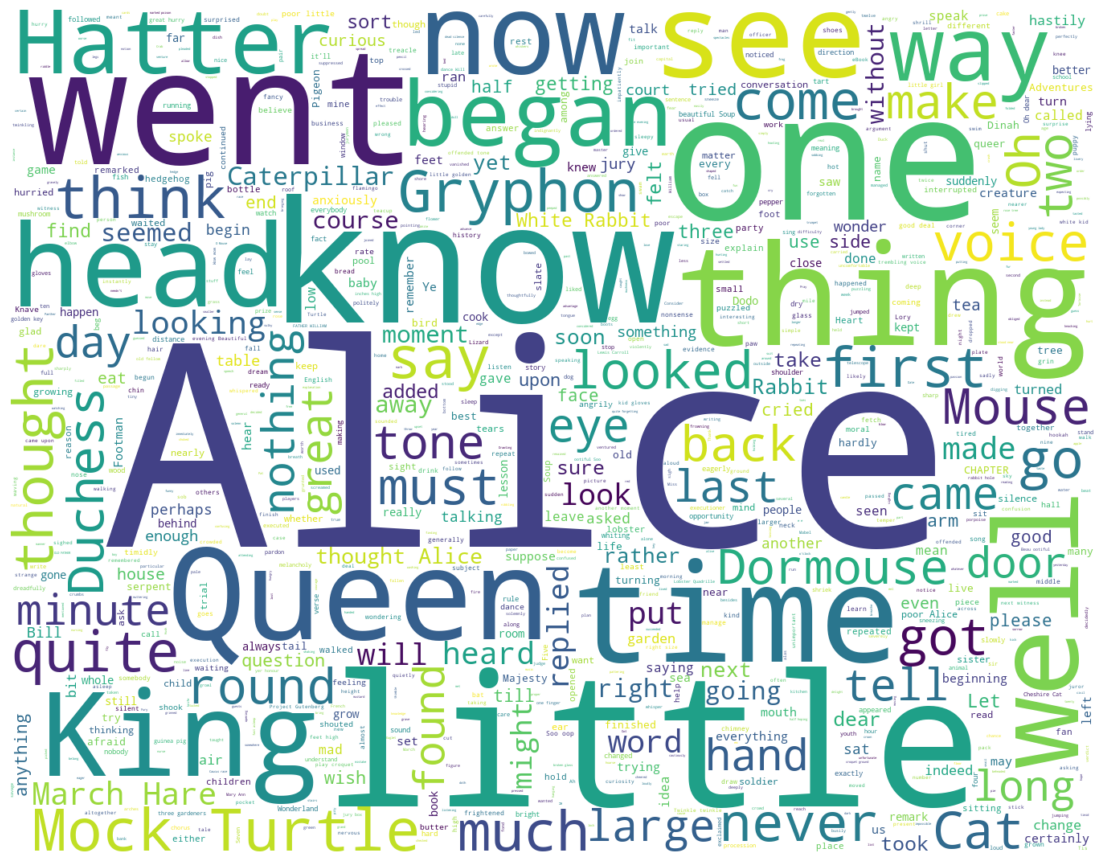

In [38]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
path_mask = prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 8/alice_mask.png'

In [40]:
alice_mask = np.array(Image.open(path_mask))
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

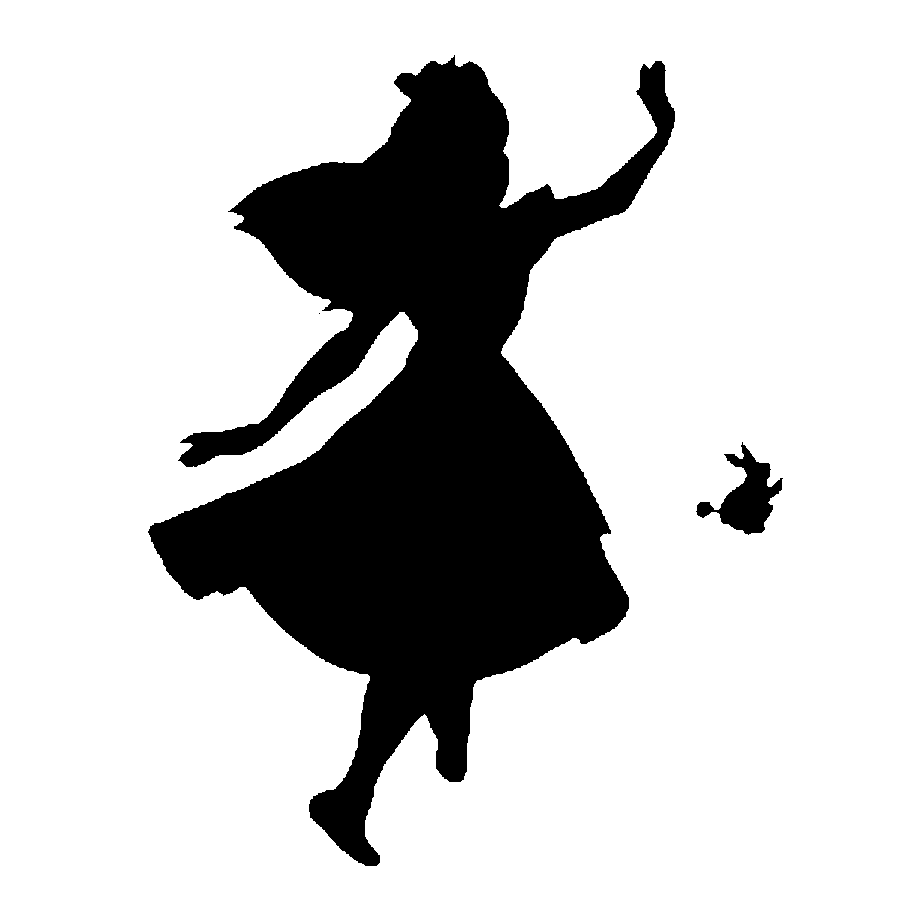

In [42]:
Image.open(path_mask)

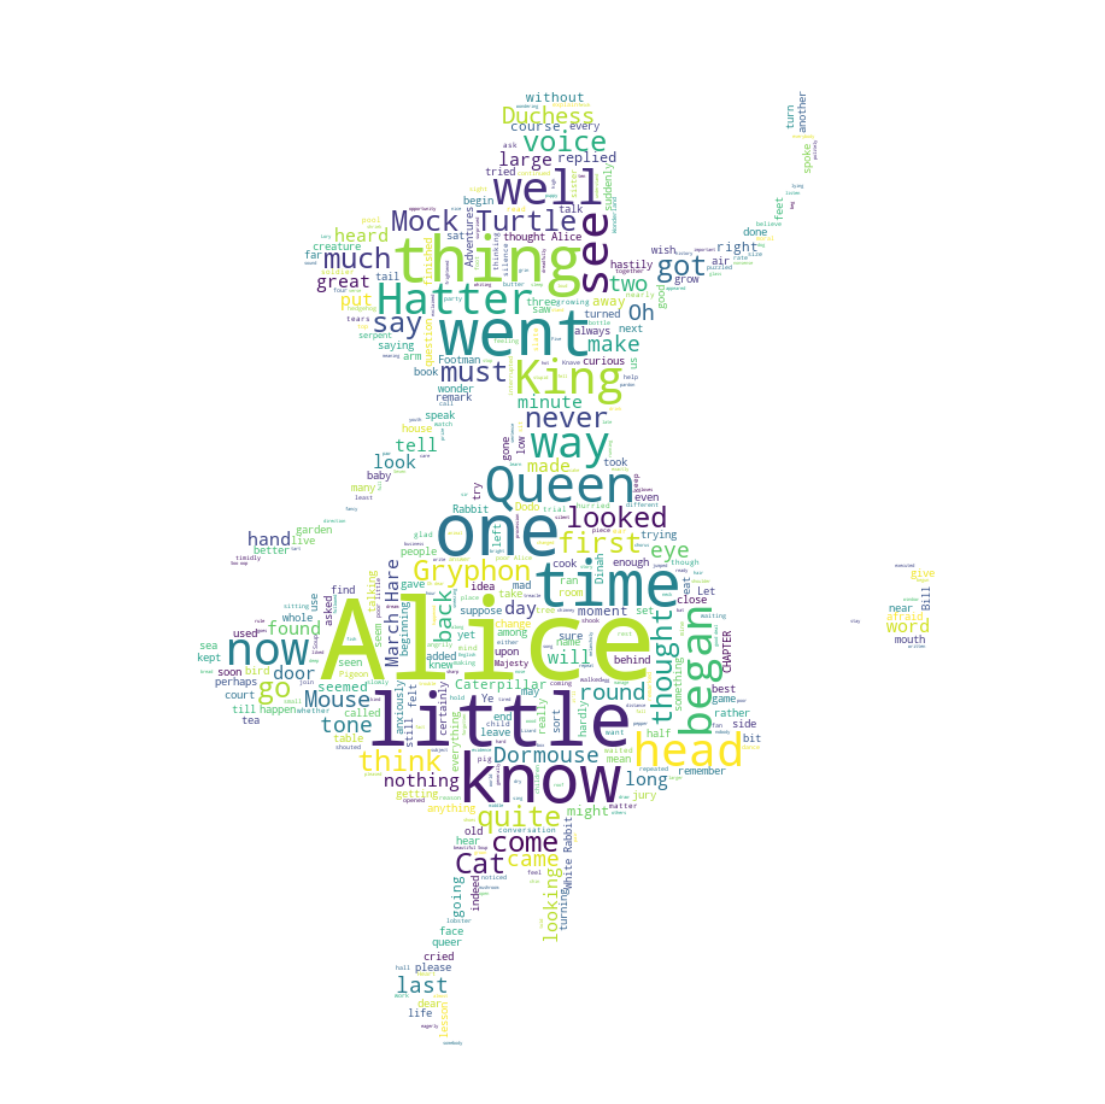

In [43]:
alice_wc = WordCloud(
                background_color='white',
                max_words=2000,
                stopwords=stopwords,
                width = 1350,
                height = 1050,
                mask=alice_mask
)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [45]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

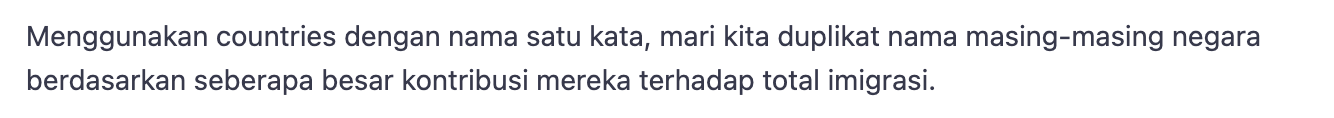

In [46]:
max_word = 90
word_string = ''

for country in df_can.index.values:
    # nge-cek nama country 1 kata atau tidak
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total'] / float(total_immigration) * max_word)
        word_string = word_string + ((country + ' ') * repeat_num_times)

        
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [47]:
wordcloud = WordCloud(
    background_color = 'white',
).generate(word_string)

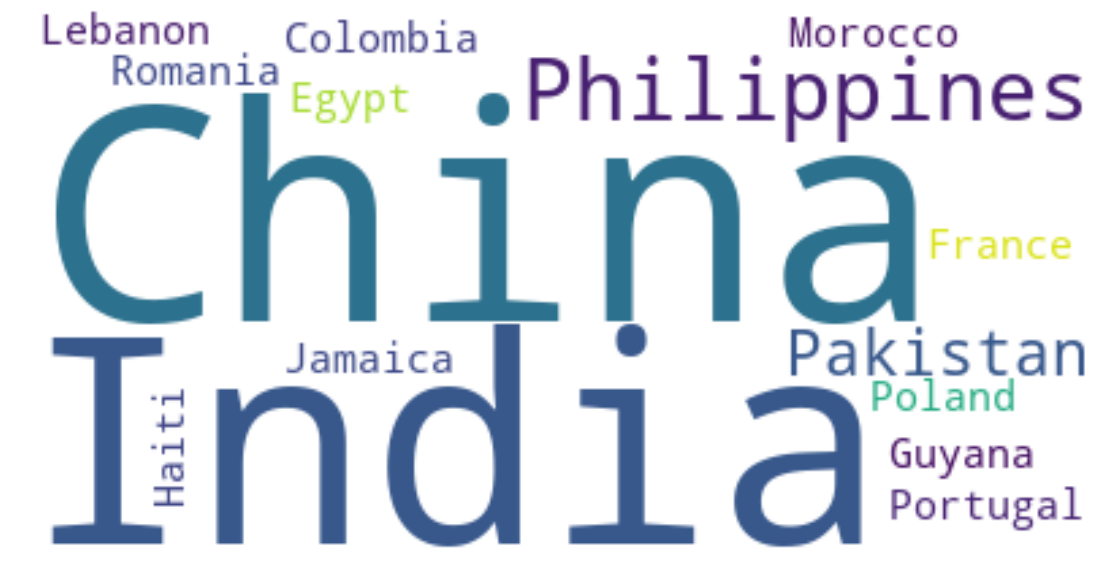

In [48]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression Plot

In [ ]:
!pip install seaborn

In [49]:
import seaborn as sns

In [50]:
sns.__version__

'0.12.2'

In [57]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

In [58]:
df_tot.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [59]:
df_tot.index = map(float, df_tot.index)

In [60]:
df_tot.head()

,0
1980.0,99137
1981.0,110563
1982.0,104271
1983.0,75550
1984.0,73417


In [61]:
df_tot.reset_index(inplace=True)

In [62]:
df_tot.head()

,index,0
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


In [63]:
df_tot.columns = ['years', 'Total']

In [64]:
df_tot.head()

,years,Total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


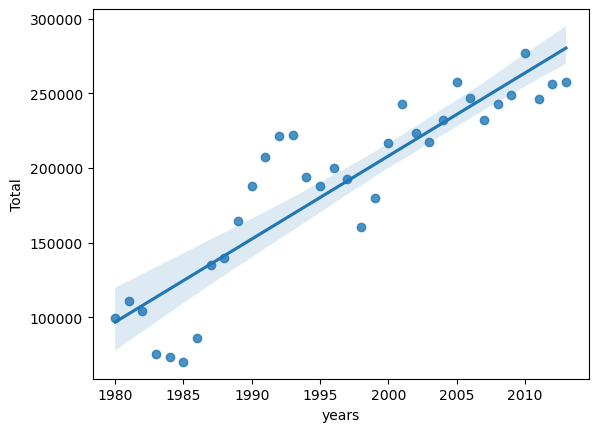

In [66]:
ax = sns.regplot(x='years',
                 y='Total',
                 data=df_tot)

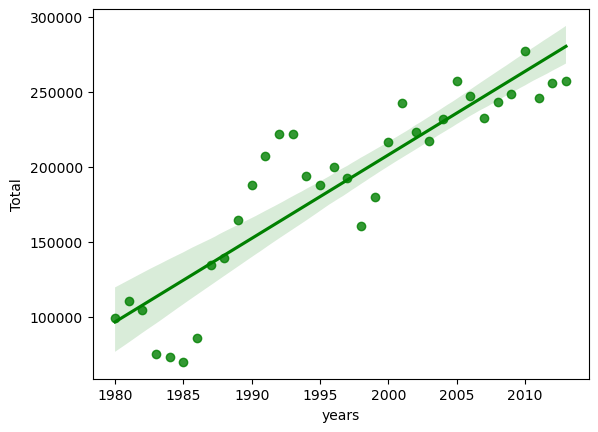

In [67]:
ax = sns.regplot(x='years',
                 y='Total',
                 data=df_tot,
                 color='green')

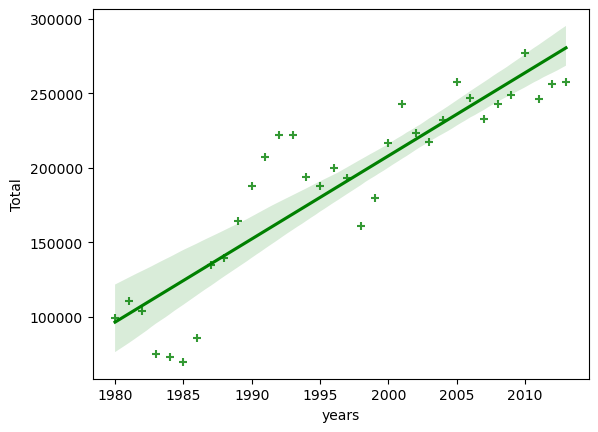

In [68]:
ax = sns.regplot(x='years',
                 y='Total',
                 data=df_tot,
                 color='green',
                 marker='+')

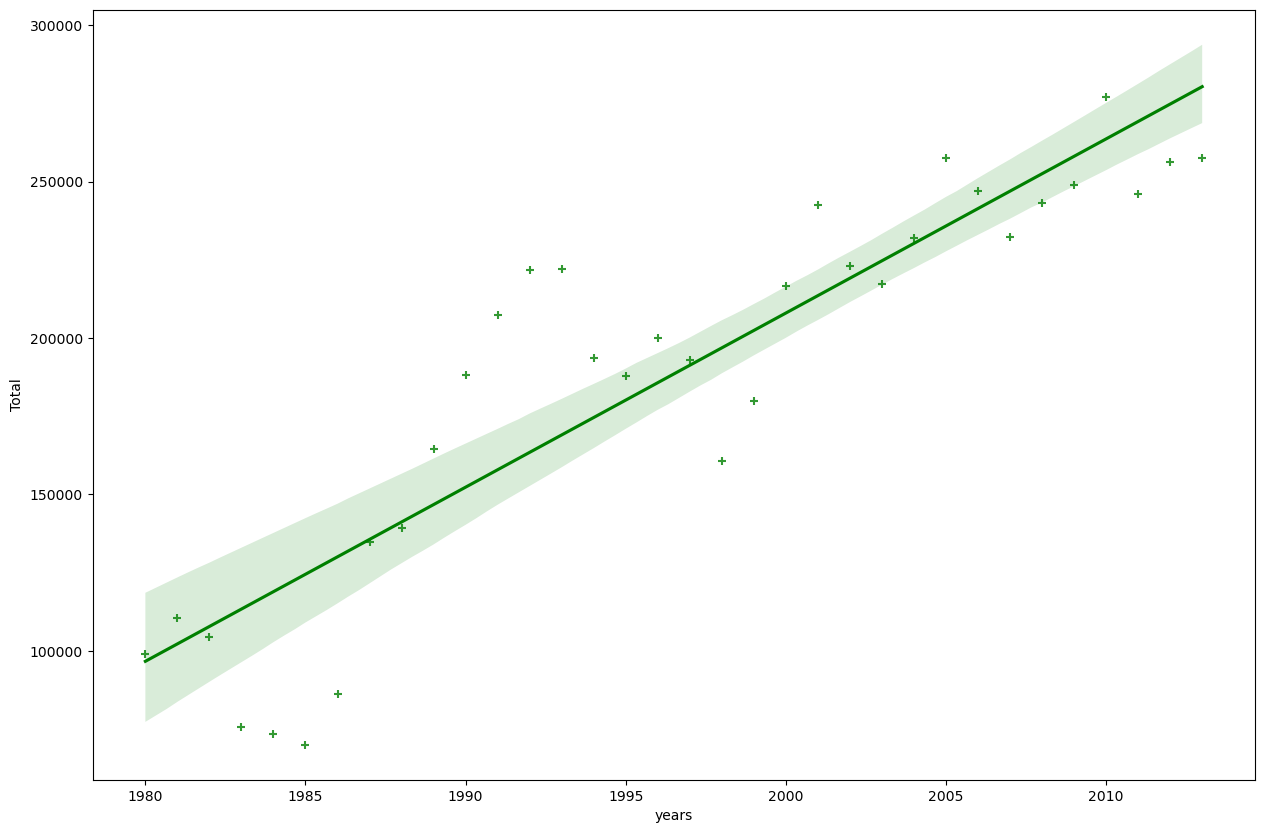

In [70]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='years',
                 y='Total',
                 data=df_tot,
                 color='green',
                 marker='+')

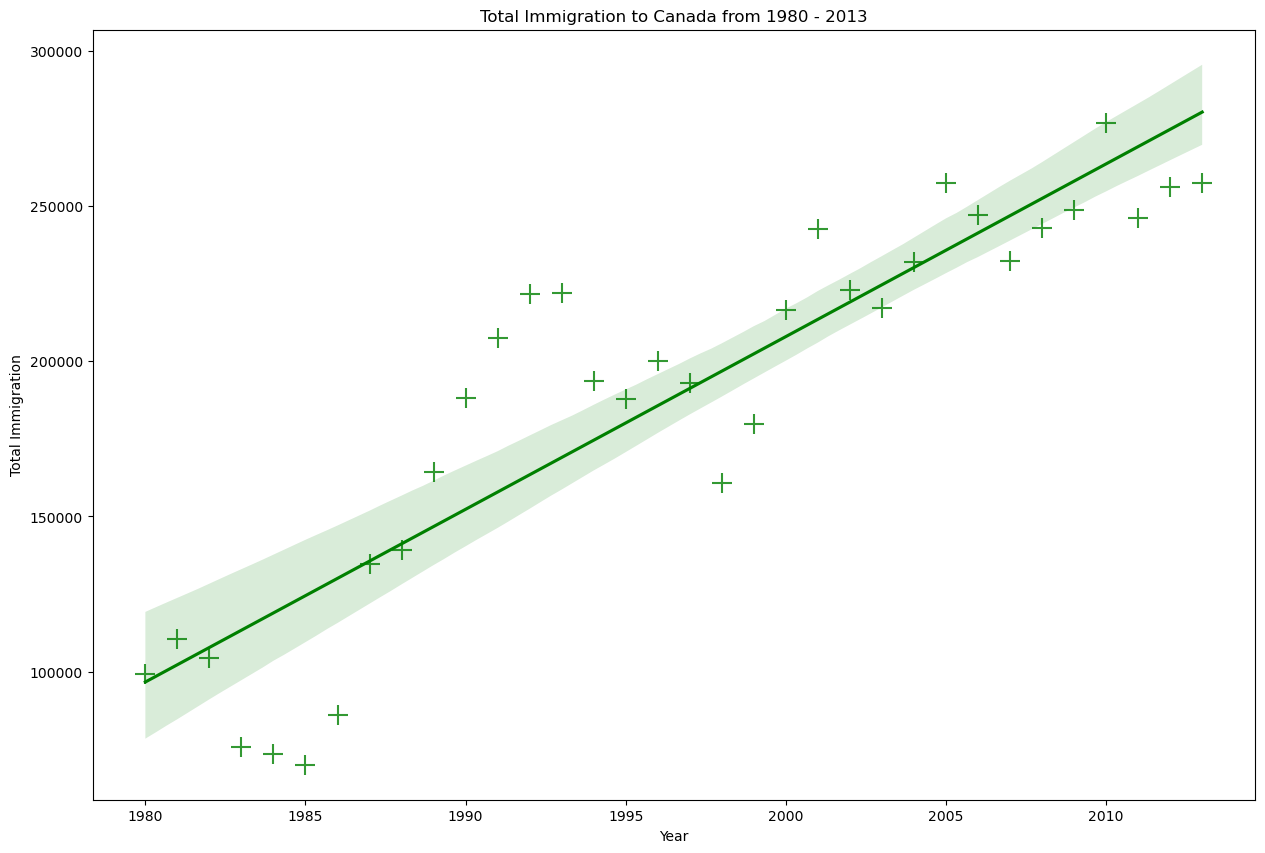

In [71]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='years',
                 y='Total',
                 data=df_tot,
                 color='green',
                 marker='+',
                 scatter_kws={'s' : 200})
ax.set(
    xlabel = 'Year',
    ylabel = 'Total Immigration'
)
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

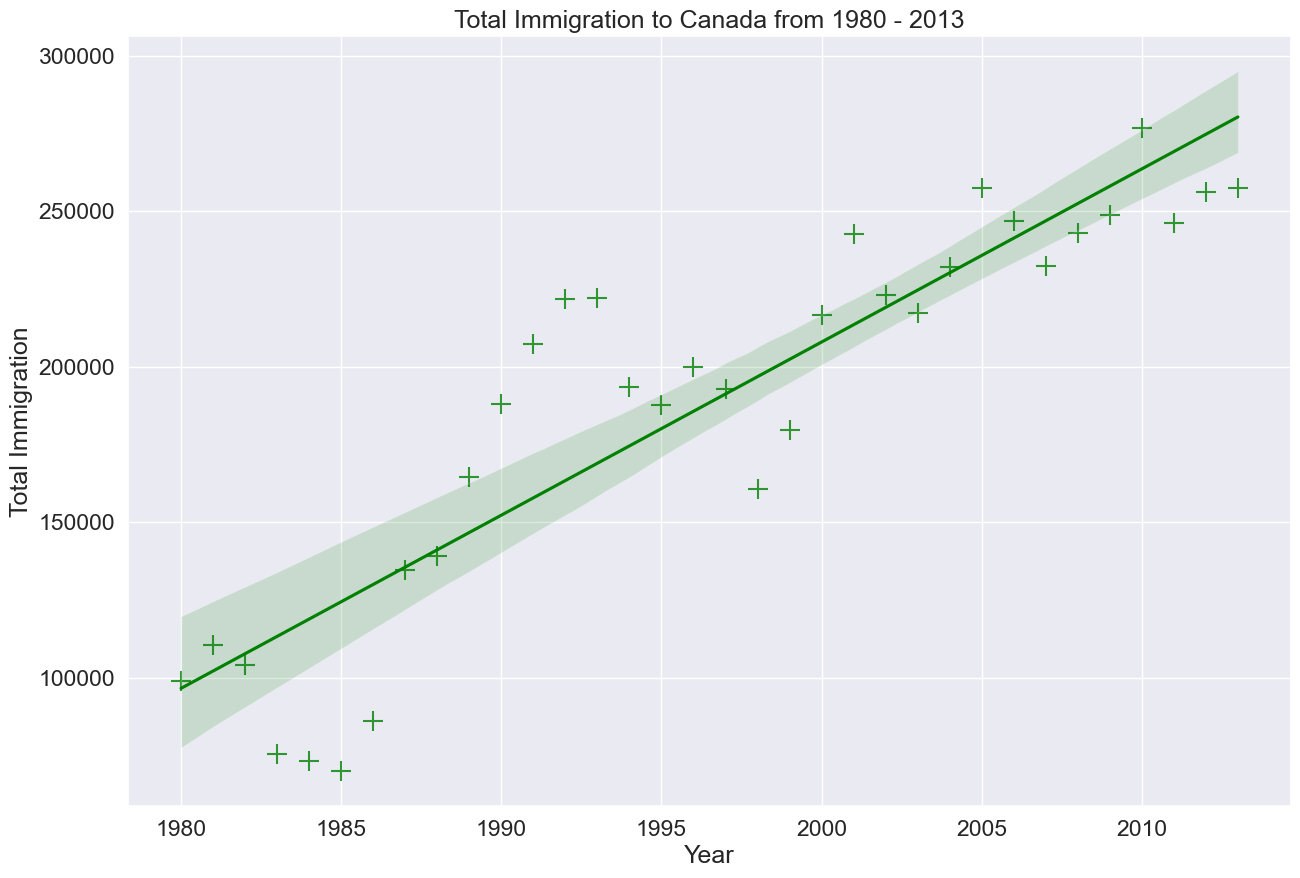

In [72]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='years',
                 y='Total',
                 data=df_tot,
                 color='green',
                 marker='+',
                 scatter_kws={'s' : 200})
ax.set(
    xlabel = 'Year',
    ylabel = 'Total Immigration'
)
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

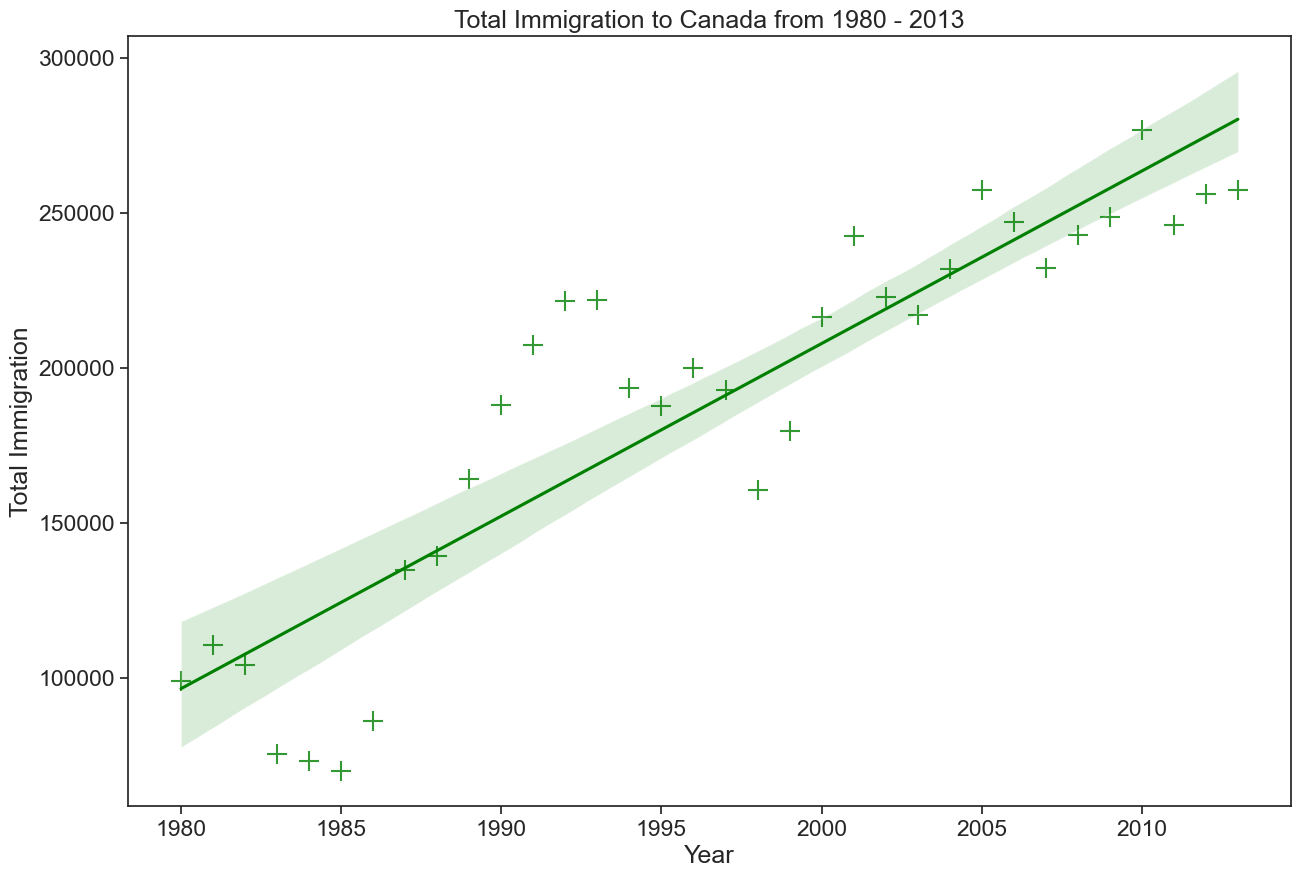

In [73]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax = sns.regplot(x='years',
                 y='Total',
                 data=df_tot,
                 color='green',
                 marker='+',
                 scatter_kws={'s' : 200})
ax.set(
    xlabel = 'Year',
    ylabel = 'Total Immigration'
)
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

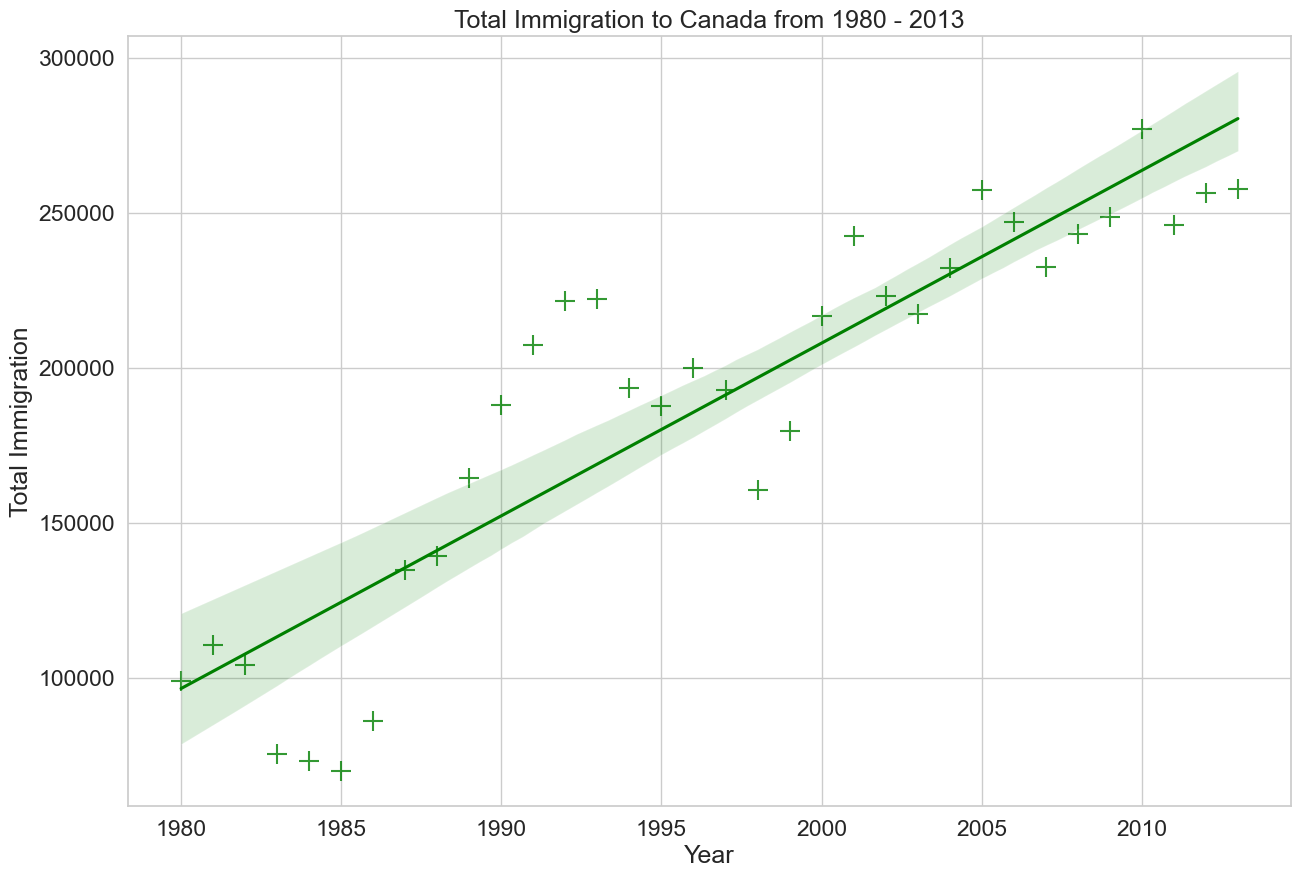

In [74]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='years',
                 y='Total',
                 data=df_tot,
                 color='green',
                 marker='+',
                 scatter_kws={'s' : 200})
ax.set(
    xlabel = 'Year',
    ylabel = 'Total Immigration'
)
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

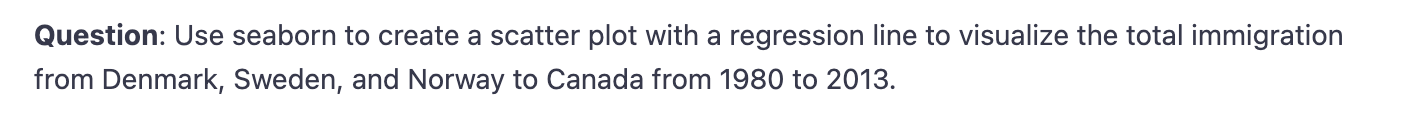

[Text(0, 0.5, 'Total Immigration'), Text(0.5, 0, 'Year')]

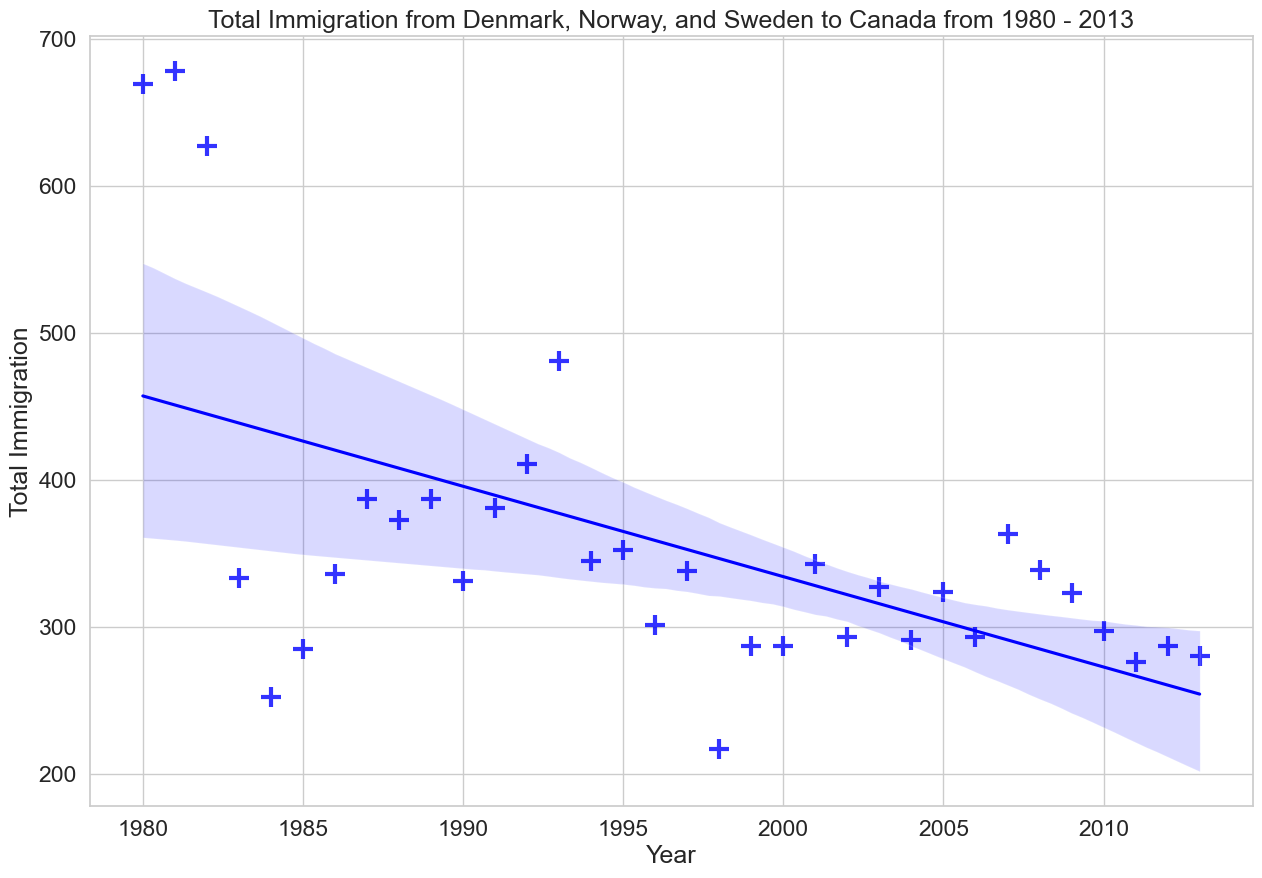

In [75]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['years', 'total']
df_total['years'] = df_total['years'].astype(int)

plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='years',
                 y='total',
                 data=df_total,
                 color='blue',
                 marker='+',
                 scatter_kws={'s' : 200, 'lw' : 3}
                )

ax.set_title('Total Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
ax.set(ylabel = 'Total Immigration', 
       xlabel = 'Year')